In [1]:
# Import the packages
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
modelConf = 'C:\\Users\\Admin\\Data Science\\DL\\YOLO\\Yolo\\files\\yolov3-tiny.cfg'
modelweights = 'C:\\Users\\Admin\\Data Science\\DL\\YOLO\\Yolo\\files\\yolov3-tiny.weights'
net = cv2.dnn.readNetFromDarknet(modelConf,modelweights)
net

< cv2.dnn.Net 000001E883E17170>

In [4]:
classesFile="C:\\Users\\Admin\\Data Science\\DL\\YOLO\\Yolo\\files\\coco.names"
with open(classesFile,'rt') as f:
    classes = f.read().rstrip('\n').split('\n')
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [5]:
len(classes)

80

In [6]:
l=net.getLayerNames()  # number of layers
len(l) 

48

In [12]:
l=net.getLayerNames()  # number of layers
len(l)
print(l)

('conv_0', 'bn_0', 'leaky_1', 'pool_1', 'conv_2', 'bn_2', 'leaky_3', 'pool_3', 'conv_4', 'bn_4', 'leaky_5', 'pool_5', 'conv_6', 'bn_6', 'leaky_7', 'pool_7', 'conv_8', 'bn_8', 'leaky_9', 'pool_9', 'conv_10', 'bn_10', 'leaky_11', 'pool_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'conv_15', 'permute_16', 'yolo_16', 'identity_17', 'conv_18', 'bn_18', 'leaky_19', 'upsample_19', 'concat_20', 'conv_21', 'bn_21', 'leaky_22', 'conv_22', 'permute_23', 'yolo_23')


In [13]:
l1 = net.getUnconnectedOutLayers()
l1
print(l1)

[36 48]


In [14]:
l[35],l[47]

('yolo_16', 'yolo_23')

In [15]:
l

('conv_0',
 'bn_0',
 'leaky_1',
 'pool_1',
 'conv_2',
 'bn_2',
 'leaky_3',
 'pool_3',
 'conv_4',
 'bn_4',
 'leaky_5',
 'pool_5',
 'conv_6',
 'bn_6',
 'leaky_7',
 'pool_7',
 'conv_8',
 'bn_8',
 'leaky_9',
 'pool_9',
 'conv_10',
 'bn_10',
 'leaky_11',
 'pool_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'conv_15',
 'permute_16',
 'yolo_16',
 'identity_17',
 'conv_18',
 'bn_18',
 'leaky_19',
 'upsample_19',
 'concat_20',
 'conv_21',
 'bn_21',
 'leaky_22',
 'conv_22',
 'permute_23',
 'yolo_23')

In [16]:
l2 = net.getUnconnectedOutLayersNames()
l2

('yolo_16', 'yolo_23')

In [17]:
frame = cv2.imread('C:\\Users\\Admin\\Data Science\\DL\\YOLO\\Yolo\\files\\images\\dog.jpg')
frame.shape

(576, 768, 3)

In [19]:
# Reshape the image
inpwidth = 416
inpheight  = 416
frame = cv2.imread('C:\\Users\\Admin\\Data Science\\DL\\YOLO\\Yolo\\files\\images\\dog.jpg')
# genrally image will take as BGR we need too change into RGB
blob = cv2.dnn.blobFromImage(frame,
                             1/255,
                             (inpwidth,inpheight),
                             [0,0,0],
                             1,
                             crop=False)

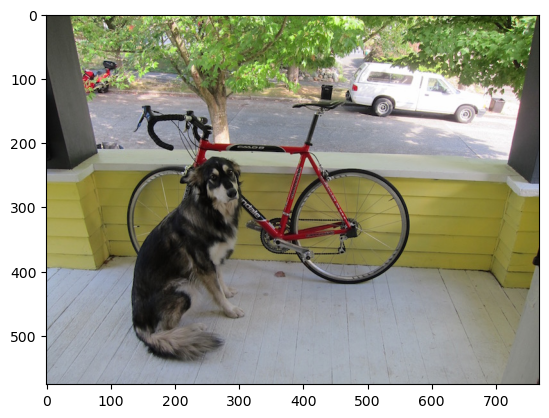

In [20]:
# Change BGR to RGB
img = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [21]:
blob.shape

(1, 3, 416, 416)

In [22]:
net.setInput(blob)

In [23]:
yolo_layers = net.getUnconnectedOutLayersNames()
outs = net.forward(yolo_layers)
outs

(array([[0.04629871, 0.04855701, 0.20454952, ..., 0.        , 0.        ,
         0.        ],
        [0.0369194 , 0.05203329, 0.148728  , ..., 0.        , 0.        ,
         0.        ],
        [0.0336024 , 0.04616932, 0.76369506, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9524836 , 0.96394104, 0.19116172, ..., 0.        , 0.        ,
         0.        ],
        [0.95709264, 0.95338875, 0.1868324 , ..., 0.        , 0.        ,
         0.        ],
        [0.9686857 , 0.9525847 , 0.79309213, ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.01915737, 0.01699536, 0.03062333, ..., 0.        , 0.        ,
         0.        ],
        [0.02472974, 0.02360387, 0.04224706, ..., 0.        , 0.        ,
         0.        ],
        [0.01501431, 0.01983077, 0.11940244, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.97540367, 0.9773502 , 0.02305202, ..., 0.        , 0.        ,
         0.        

In [26]:
len(outs[0])

507

In [27]:
len(outs[0][0])

85

In [34]:
len(outs[1])

2028

In [35]:
len(outs[1][0])

85

In [36]:
# Detect the Bounding Boxes
frameheight = frame.shape[0]
framewidth = frame.shape[1]
boxes = []
confidences = []
classID = []
for out in outs :
    for detection in out:
        score = detection[5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        if confidence > 0.70 :
            print(detection)
            centerX = int(detection[0] * framewidth)
            centerY = int(detection[1] * frameheight)
            width = int(detection[2] * framewidth)
            height = int(detection[3] * frameheight)
            left = int(centerX - width/2)
            top = int(centerY - height/2)
            
            classID.append(class_id)
            confidences.append(float(confidence))
            boxes.append([left,top,width,height])
boxes

[0.7506749  0.22071578 0.28650135 0.15503977 0.9590338  0.
 0.         0.7252457  0.         0.         0.         0.
 0.39470372 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[0.32989582 0.64003456 0.33577296 0.520143   0.83338046 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.       

[[466, 82, 220, 89], [124, 218, 257, 299]]

In [38]:
len(boxes)

2

In [39]:
np.max(boxes[0])

466

In [40]:
np.max(boxes[1])

299

In [41]:
len(outs[0])+len(outs[1])

2535

In [42]:
confidences

[0.7252457141876221, 0.8289399147033691]

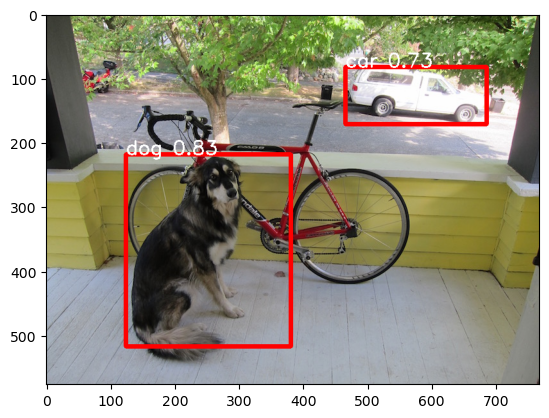

In [47]:
# Apply the bounding box
font = cv2.FONT_HERSHEY_SIMPLEX
color = (255,0,0)
for i in indexes:
    x,y,w,h = boxes[i]
    label = str(classes[classID[i]])
    confi = str(round(confidences[i],2))
    cv2.rectangle(img,(x,y),(x+w,y+h),color,5,i)
    cv2.putText(img,label + " " +confi,(x,y),font,1,(255,255,255),2)
plt.imshow(img)